# iFood Dev Week

Saiba mais sobre essa semana incrível nos artigos:
- [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week)
- [Fechando a iFood Dev Week Com Chave de Ouro](https://web.dio.me/articles/fechando-a-ifood-dev-week-com-chave-de-ouro)

## Dia 1: [Conheça o Google Colab e o Projeto Desta Dev Week](https://www.youtube.com/live/59XwC5e8U1k?feature=share)

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [2]:
%pip install gdown

     -------------------------------------- 62.6/62.6 kB 159.6 kB/s eta 0:00:00
     -------------------------------------- 78.3/78.3 kB 544.1 kB/s eta 0:00:00
     ------------------------------------ 143.0/143.0 kB 845.5 kB/s eta 0:00:00
     -------------------------------------- 96.2/96.2 kB 687.5 kB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     ------------------------------------ 123.8/123.8 kB 559.4 kB/s eta 0:00:00
     -------------------------------------- 158.3/158.3 kB 1.2 MB/s eta 0:00:00
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
"""
Este código baixa um arquivo CSV de feedbacks do Google Drive e carrega os dados em um DataFrame pandas.

O arquivo é identificado por um ID único ('file_id'), que é extraído da URL do arquivo no Google Drive.
A URL do arquivo no Google Drive tem o seguinte formato:
https://drive.google.com/file/d/FILE_ID/view?usp=sharing
https://drive.google.com/file/d//view?usp=sharing
"""

import gdown
import pandas as pd

file_id = '1udBS_lnCGVo6CiqcVrxUNoduVxvaO8VS'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedback.csv')

Downloading...
From: https://drive.google.com/uc?id=1udBS_lnCGVo6CiqcVrxUNoduVxvaO8VS
To: c:\Workspace\AnaliseSentimentoPython\feedback.csv
100%|██████████| 400/400 [00:00<00:00, 200kB/s]


'feedback.csv'

In [6]:
dados = pd.read_csv('./feedback.csv', delimiter=',')

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    # Por ser uma list do Python, aplicamos o conceito de "list comprehension" para filtrar nossos Feedbacks.
    detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (promotores - detratores) / len(self.feedbacks) * 100

feedbacks = dados.apply(lambda linha: Feedback(linha['Notas'], linha['Comentários']), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

-22.22222222222222


#### Versão 1: Paradigma Imperativo.

In [7]:
#@title
"""
Versão 1: Paradigma Imperativo.

Este script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.
O NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.
A implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.
"""

notas = dados['Notas']

detratores = 0
promotores = 0

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100

print(nps)

-22.22222222222222


#### Versão 2: Paradigma Funcional.

In [8]:
#@title
"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""

import pandas as pd

def calcular_nps(notas):
  detratores = notas.apply(lambda nota: nota <= 6).sum()
  promotores = notas[notas >= 9].count()

  return (promotores - detratores) / len(notas) * 100

def calcular_nps2(notas):
    detratores = sum(nota <= 6 for nota in notas)
    promotores = sum(nota >= 9 for nota in notas)
    return (promotores - detratores) / len(notas) * 100


notas = dados['Notas']
notas2 = dados['Notas']

nps = calcular_nps(notas)
nps2 = calcular_nps2(notas)

print(nps)
print(nps2)

-22.22222222222222
-22.22222222222222


#### Versão 3: Paradigma Orientado a Objetos (POO).

In [9]:
"""
Versão 3: Paradigma Orientado a Objetos (POO).

Este script adota uma abordagem Orientada a Objetos (OO) para calcular o NPS a partir de feedback de usuários.
Duas classes são definidas, onde:
- Feedback representa um único feedback de usuário;
- AnalisadorFeedback é usado para calcular o NPS a partir de uma lista de Feedbacks.
A POO fornece uma abstração mais clara dos dados e comportamentos envolvidos no cálculo do NPS.
Desta forma, nossa solução estará preparada para as evoluções do nosso projeto.
"""

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    # Por ser uma list do Python, aplicamos o conceito de "list comprehension" para filtrar nossos Feedbacks.
    detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (promotores - detratores) / len(self.feedbacks) * 100

feedbacks = dados.apply(lambda linha: Feedback(linha['Notas'], linha['Comentários']), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

-22.22222222222222


## Dia 2: [Desvendando o Poder dos Seus Dados com Python](https://www.youtube.com/live/2Y59NEO9KU4?feature=share)

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

In [11]:
%pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 556.0 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------ 965.4/965.4 kB 686.6 kB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 741.8 kB/s eta 0:00:00
     ------------------------------------ 103.1/103.1 kB 424.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


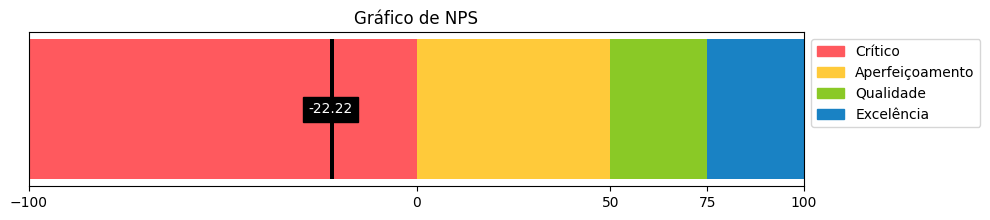

In [12]:
"""
Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1!
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def criar_grafico_nps(nps):
  # Inicia a figura e os eixos.
  fig, ax = plt.subplots(figsize=(10, 2))

  # Itera sobre as zonas para criar a barra de cores do gráfico.
  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  # Cria a "seta" que vai indicar o NPS no gráfico.
  ax.barh([0], width=1, left=nps, color='black')
  # Remove os ticks do eixo Y
  ax.set_yticks([])
  # Define os limites do eixo X
  ax.set_xlim(-100, 100)
  # Define os ticks do eixo X
  ax.set_xticks(NPS_VALORES)

  # Inclui um texto com o valor de NPS, o qual ficará alinhado com a "seta" criada anteriormente.
  plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  # Cria a legenda do gráfico
  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  # Inclui um título no gráfico.
  plt.title('Gráfico de NPS')

  # Mostra o gráfico.
  plt.show()

criar_grafico_nps(nps)

## Dia 3: [Decifrando Sentimentos com Inteligência Artificial (IA)](https://www.youtube.com/live/wj9tVSWVzOM?feature=share)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [13]:
%pip install openai

     -------------------------------------- 77.0/77.0 kB 327.0 kB/s eta 0:00:00
     ------------------------------------ 326.9/326.9 kB 920.6 kB/s eta 0:00:00
     --------------------------------------- 61.2/61.2 kB 66.5 kB/s eta 0:00:00
     -------------------------------------- 61.4/61.4 kB 251.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from dotenv import load_dotenv
import os
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

load_dotenv()

openai_api_key = os.getenv('API_KEY')

In [16]:
"""
Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos nossos comentários.
Seguem alguns links úteis:
1. Endpoint que vamos consumir: https://platform.openai.com/docs/api-reference/chat/create
2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da
"""

import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):

  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """
  prompt2 = f"""
            Classifique entre Positivo, Neutro e Negativo, mostrando a nota e sugerindo melhora
            {comentarios_formatados}
            """

  #vem da documentação da API
  respostaAPI = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {   #Dando contexto pro programa
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt2
      }
    ]
  )
  # Retorno da resposta pela API
  return respostaAPI.choices[0].message.content

insigths = analisar_sentimentos(feedbacks)
print(insigths)

- Nota 9: Positivo. Experiência excelente! O feedback é muito positivo, não há sugestões de melhora apresentadas.

- Nota 7: Positivo. Bootcamp bom, porém o aluno sente falta de mentorias sobre IA para torná-lo perfeito. Sugestão de melhora: adicionar mentorias sobre IA.

- Nota 5: Neutro. Bootcamp considerado razoável, mas o aluno espera que o próximo seja sobre python. Não há sugestões específicas de melhora além dessa.

- Nota 7: Positivo. Bootcamp bom, porém o aluno sente falta de mentorias sobre IA para torná-lo perfeito. Sugestão de melhora: adicionar mentorias sobre IA.

- Nota 6: Neutro. Bootcamp considerado bom, mas o aluno acha que o material poderia ser mais completo. Sugestão de melhora: melhorar a qualidade do material apresentado.

- Nota 5: Neutro. O aluno não destaca nada de especial sobre o bootcamp.

- Nota 7: Positivo. O aluno gostou muito do bootcamp, mas não oferece sugestões específicas de melhora.

- Nota 3: Negativo. O aluno não gostou do bootcamp, mas não ofere